In [ ]:
!pip install numpy
!pip install pandas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
netflixDf = pd.read_csv("netflix.csv")

FileNotFoundError: ignored

In [ ]:
netflixDf

In [ ]:
netflixDf.head()

In [ ]:
netflixDf.info()

In [ ]:
netflixDf.shape

(5398, 12)

In [ ]:
netflixDf.describe()

In [ ]:
netflixDf.describe(include ="object").T

,count,unique,top,freq
show_id,5398,5398,s1,1
type,5398,3,Movie,3464
title,5397,5397,Dick Johnson Is Dead,1
director,5398,2722,unknown_director,1883
cast,5398,4750,unknown_actor,495
country,5398,476,United States,1545
date_added,5398,1178,"July 1, 2021",60
rating,5398,12,TV-MA,2246
duration,5398,209,1 Season,1258
listed_in,5397,430,Stand-Up Comedy,239


In [ ]:
netflixDf["type"].value_counts()

# **FILLING MISSING VALUES**

In [ ]:
netflixDf.isna().sum()

show_id         0
type            0
title           1
director        0
cast            0
country         0
date_added      0
release_year    1
rating          0
duration        0
listed_in       1
description     1
dtype: int64



*   Out of 12 columns, the 6 columns such as director, cast, country ,
date_added,rating,duration are having null values.
so we have to fill those cells with data related to their columns.





In [ ]:
netflixDf ["director"] = netflixDf["director"].fillna('unknown_director')
netflixDf ["cast"] = netflixDf["cast"].fillna('unknown_actor')
netflixDf ["country"] = netflixDf["country"].fillna('unknown')
netflixDf ["date_added"] = netflixDf["date_added"].fillna('unknown_date')
netflixDf ["rating"] = netflixDf["rating"].fillna('NA')
netflixDf ["duration"] = netflixDf["duration"].fillna(value='0')
netflixDf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown_actor,United States,"September 25, 2021",2020.0,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown_director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021.0,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,"September 24, 2021",2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,unknown_director,unknown_actor,unknown,"September 24, 2021",2021.0,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,unknown_director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021.0,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
netflixDf["director"].mode()

0    unknown_director
Name: director, dtype: object

In [ ]:
netflixDf["director"].value_counts()

unknown_director            1883
Rajiv Chilaka                 17
Suhas Kadav                   15
Raúl Campos, Jan Suter        14
Marcus Raboy                  13
                            ... 
Santiago Alvarado Ilarri       1
Frasco Mortiz                  1
John Whitesell                 1
Antonio Díaz                   1
Sushil Majumdar                1
Name: director, Length: 2722, dtype: int64

#**UN-NESTING**

In [ ]:
netflixDf["cast"]

0                                           unknown_actor
1       Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2       Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
3                                           unknown_actor
4       Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
                              ...                        
5393    Jeanette Aw, Elvin Ng, Zhou Ying, Christopher ...
5394                                         Hans Teeuwen
5395    İbrahim Çelikkol, Belçim Bilgin, Alican Yüceso...
5396    Raaj Kumar, Hema Malini, Rakhee Gulzar, Vinod ...
5397                                        unknown_actor
Name: cast, Length: 5398, dtype: object

In [ ]:
netflixDf["cast"].str.split(',')

0                                         [unknown_actor]
1       [Ama Qamata,  Khosi Ngema,  Gail Mabalane,  Th...
2       [Sami Bouajila,  Tracy Gotoas,  Samuel Jouy,  ...
3                                         [unknown_actor]
4       [Mayur More,  Jitendra Kumar,  Ranjan Raj,  Al...
                              ...                        
5393    [Jeanette Aw,  Elvin Ng,  Zhou Ying,  Christop...
5394                                       [Hans Teeuwen]
5395    [İbrahim Çelikkol,  Belçim Bilgin,  Alican Yüc...
5396    [Raaj Kumar,  Hema Malini,  Rakhee Gulzar,  Vi...
5397                                      [unknown_actor]
Name: cast, Length: 5398, dtype: object

 # **1. Find the counts of each categorical variable both using graphical and non graphical analysis.**

From the given dataset,

**categorical variables are :** type , title, director, cast,country,date_added, rating and duration.

In [ ]:
#1.a) Non - Graphical Approach

categorical_columns = ['type', 'title','director','cast','country','date_added', 'rating', 'duration']
for column in categorical_columns:
  unique_counts = netflixDf[column].value_counts()
  print(unique_counts)



Movie      3464
TV Show    1933
TV Sh         1
Name: type, dtype: int64
Dick Johnson Is Dead                 1
Hasta los dientes                    1
Sintonia                             1
Rocko's Modern Life: Static Cling    1
Jaoon Kahan Bata Ae Dil              1
                                    ..
I Am Woman                           1
Black '47                            1
Ajab Prem Ki Ghazab Kahani           1
The Devil Punisher                   1
Lal Patthar                          1
Name: title, Length: 5397, dtype: int64
unknown_director            1883
Rajiv Chilaka                 17
Suhas Kadav                   15
Raúl Campos, Jan Suter        14
Marcus Raboy                  13
                            ... 
Santiago Alvarado Ilarri       1
Frasco Mortiz                  1
John Whitesell                 1
Antonio Díaz                   1
Sushil Majumdar                1
Name: director, Length: 2722, dtype: int64
unknown_actor                                       

In [ ]:
#1.b) Graphical Approach
import matplotlib.pyplot as plt
import seaborn as sns

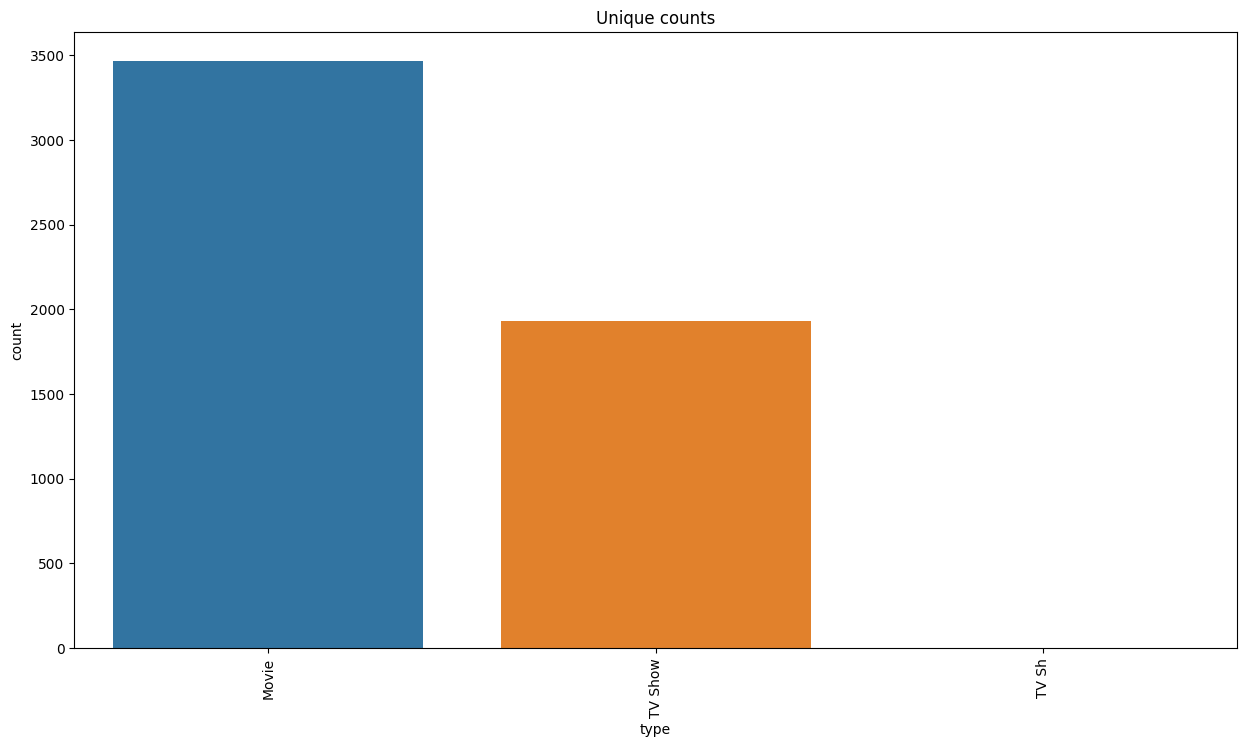

KeyboardInterrupt: ignored

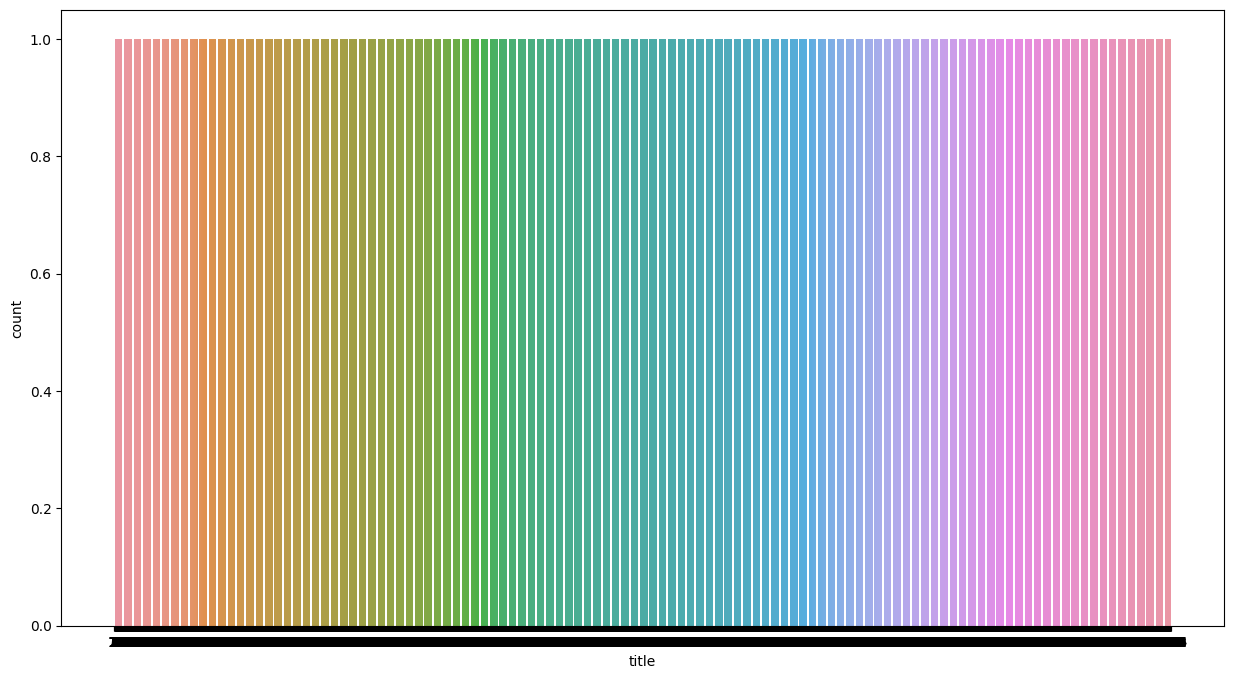

In [ ]:
categorical_columns = ['type', 'title','director','cast','country','date_added', 'rating', 'duration']
for column in categorical_columns:
  plt.figure(figsize=(15,8))
  sns.countplot(data=netflixDf,x = column)
  plt.xticks(rotation=90)
  plt.title("Unique counts")
  plt.show()

#2. **Comparison of tv shows vs. movies**

# 2.a) Find the number of movies produced in each country and pick the top 10 countries.

In [ ]:
netflixDf

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown_actor,United States,"September 25, 2021",2020.0,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown_director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021.0,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,"September 24, 2021",2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,unknown_director,unknown_actor,unknown,"September 24, 2021",2021.0,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,unknown_director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021.0,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
5393,s5394,TV Show,Breakout,unknown_director,"Jeanette Aw, Elvin Ng, Zhou Ying, Christopher ...",unknown,"July 1, 2017",2010.0,TV-14,1 Season,"International TV Shows, TV Dramas",After losing her family in a suspicious car cr...
5394,s5395,Movie,Hans Teeuwen: Real Rancour,Doesjka van Hoogdalem,Hans Teeuwen,Netherlands,"July 1, 2017",2018.0,TV-MA,86 min,Stand-Up Comedy,Comedian Hans Teeuwen rebels against political...
5395,s5396,TV Show,Intersection,unknown_director,"İbrahim Çelikkol, Belçim Bilgin, Alican Yüceso...",Turkey,"July 1, 2017",2016.0,TV-MA,3 Seasons,"International TV Shows, Romantic TV Shows, TV ...",Two wealthy businessmen with car obsessions cr...
5396,s5397,Movie,Lal Patthar,Sushil Majumdar,"Raaj Kumar, Hema Malini, Rakhee Gulzar, Vinod ...",India,"July 1, 2017",1971.0,TV-14,153 min,"Classic Movies, Dramas, International Movies","A vain, self-righteous nobleman falls in love ..."


In [ ]:
movieDf=netflixDf[netflixDf["type"]=="Movie"]
movieDf

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown_actor,United States,"September 25, 2021",2020.0,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",unknown,"September 24, 2021",2021.0,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993.0,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021.0,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021.0,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...,...,...
5387,s5388,Movie,10 jours en or,Nicolas Brossette,"Franck Dubosc, Claude Rich, Marie Kremer, Math...",France,"July 1, 2017",2012.0,TV-14,97 min,"Comedies, Dramas, International Movies",When a carefree bachelor is unexpectedly left ...
5389,s5390,Movie,A 2nd Chance,Clay Glen,"Nina Pearce, Adam Tuominen, Emily Morris, Amy ...",Australia,"July 1, 2017",2011.0,PG,95 min,"Children & Family Movies, Dramas, Sports Movies",A gymnast lacks the confidence she needs to re...
5391,s5392,Movie,Amrapali,Lekh Tandon,"Vyjayantimala, Sunil Dutt, Prem Nath, Bipin Gu...",India,"July 1, 2017",1966.0,TV-PG,116 min,"Dramas, International Movies, Music & Musicals",In the age of Buddha and his philosophy of non...
5394,s5395,Movie,Hans Teeuwen: Real Rancour,Doesjka van Hoogdalem,Hans Teeuwen,Netherlands,"July 1, 2017",2018.0,TV-MA,86 min,Stand-Up Comedy,Comedian Hans Teeuwen rebels against political...


In [ ]:
country_movie_count = movieDf["country"].value_counts()
country_movie_count.head(10)

United States     969
India             557
unknown           361
United Kingdom     81
Nigeria            73
Spain              70
Philippines        67
Japan              62
Canada             55
Turkey             55
Name: country, dtype: int64

# 2.b) Find the number of Tv-Shows produced in each country and pick the top 10 countries.

In [ ]:
tvshowDf=netflixDf[netflixDf["type"]=="TV Show"]
country_count_Tvshow = tvshowDf["country"].value_counts()
country_count_Tvshow.head(10)

United States     576
unknown           301
Japan             141
South Korea       111
United Kingdom    109
India              45
Spain              40
France             40
Taiwan             37
Canada             34
Name: country, dtype: int64

# **3. What is the best time to launch a TV show?**

3. a) Find which is the best week to release the Tv-show or the movie. Do the analysis
separately for Tv-shows and Movies

In [ ]:
tvshowDf = netflixDf[netflixDf["type"]=="TV Show"]
movieDf=netflixDf[netflixDf["type"]=="Movie"]


In [ ]:
netflixDf["date_added"].info()  # need to convert the object datatype to date time

# **4. Analysis of actors/directors of different types of shows/movies**

# 4.a) Identify the top 10 directors who have appeared in most movies or TV shows

In [ ]:
netflixDf["director"].unique()

In [ ]:
len(netflixDf["director"].unique())

4529

In [ ]:
netflixDf["director"].nunique()

4529

In [ ]:
netflixDf['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [ ]:
tv_shows_and_movies_df = [netflixDf['type'].isin(['TV Show', 'Movie'])]
tv_shows_and_movies_df

[0       True
 1       True
 2       True
 3       True
 4       True
         ... 
 8802    True
 8803    True
 8804    True
 8805    True
 8806    True
 Name: type, Length: 8807, dtype: bool]

In [ ]:
tv_shows_and_movies_df = df[df['type'].isin(['TV Show', 'Movie'])]
directors_df = tv_shows_and_movies_df.assign(director=tv_shows_and_movies_df['director'].str.split(','))
directors_df = directors_df.explode('director')
director_counts = directors_df['director'].value_counts()
top_10_directors = director_counts.head(10)
top_10_directors


Rajiv Chilaka          22
Raúl Campos            18
 Jan Suter             18
Marcus Raboy           16
Suhas Kadav            16
Jay Karas              15
Cathy Garcia-Molina    13
Martin Scorsese        12
Jay Chapman            12
Youssef Chahine        12
Name: director, dtype: int64

# **5. Which genre movies are more popular or produced more**


In [ ]:
movies_df = netflixDf[netflixDf['type'] == 'Movie']
genres_df = movies_df.assign(genres=movies_df['listed_in'].str.split(','))
genres_df = genres_df.explode('genres')
genre_counts = genres_df['genres'].value_counts()
top_10_genres = genre_counts.head(10)
top_10_genres

 International Movies       1666
Dramas                       906
Comedies                     756
 Dramas                      520
Action & Adventure           464
 Romantic Movies             397
Documentaries                377
 Independent Movies          366
Children & Family Movies     357
 Thrillers                   294
Name: genres, dtype: int64

# **6. Find After how many days the movie will be added to Netflix after the release of the movie (you can consider the recent past data)**

In [ ]:
movies_df = netflixDf[netflixDf['type'] == 'Movie']
movies_df['date_added'] = pd.to_datetime(movies_df['date_added'])
movies_df['days_to_netflix'] = (movies_df['date_added'] - pd.to_datetime(movies_df['release_year'], format='%Y')).dt.days
print(movies_df['days_to_netflix'].mean())


1828.7736720554271


<ipython-input-59-b40bb6667aed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['date_added'] = pd.to_datetime(movies_df['date_added'])
<ipython-input-59-b40bb6667aed>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['days_to_netflix'] = (movies_df['date_added'] - pd.to_datetime(movies_df['release_year'], format='%Y')).dt.days
